# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 2. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко.
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `...`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 2 &mdash; 40 баллов.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 3 &mdash; 80 баллов;
* Задача 4 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad4_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [73]:
from typing import Tuple
import numpy as np
from sklearn import datasets

from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

sns.set(palette="Set2")
cm_bright = ListedColormap(["#FF3300", "#00CC66"])

В условии задания обозначены области, в которых запрещено использование ИИ-инструментов. Это не исчерпывающий список. Подробные правила можно найти <a href="https://thetahat.ru/courses/ai-rules">по ссылке на сайте</a>. В частности, запрещено применять ИИ-инструменты при решении теоретических частей задач, ответах на вопросы и написании выводов.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 2.

**При решении задачи запрещено пользоваться ИИ-инструментами,** но можно при оформлении решения.

Рассмотрим двухслойную полносвязную нейронную сеть, которая принимает на вход $x\in\mathbb{R}^d$ и возвращает $y\in\{0, 1\}$
$$y_\theta(x) = \sigma_2 \big( \sigma_1 \left( x^{\top} W_1 + b_1 \right) W_2 + b_2 \big),$$
где
* $W_1 \in \mathbb{R}^{d \times h}, b_1 \in \mathbb{R}^{h}$ &mdash; параметры 1-го слоя,
* $W_2 \in \mathbb{R}^{h \times 1}, b_2 \in \mathbb{R}$ &mdash; параметры 2-го слоя,
* $\theta = (W_1, b_1, W_2, b_2)$ — все параметры нейросети,
* $\sigma_1(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ &mdash; гиперболический тангенс, функция активации 1-го слоя, применяется поэлементно,
* $\sigma_2(x) = \frac{1}{1 + e^{-x}}$ &mdash; логистическая сигмоида, функция активации 2-го слоя.

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

*Для вставки изображения скопируйте его и вставьте в ячейку markdown с помощью `Ctrl+V`. Должно появится либо большое количество символов (Colab), либо что-то вроде `![image.png](attachment:image.png)`.*

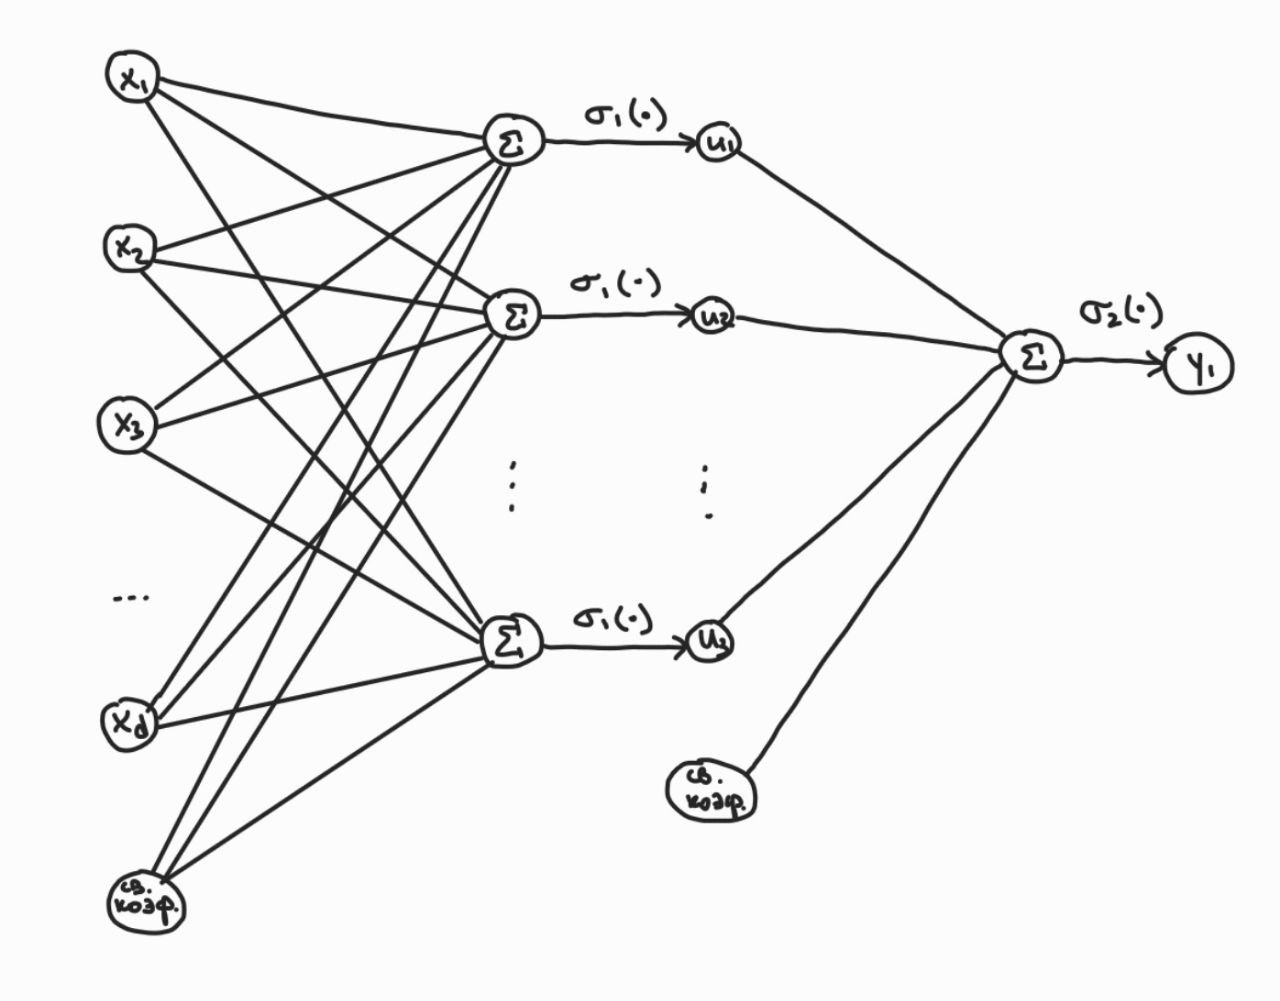

Обучаемых параметров: $d \cdot h + h + h \cdot 1 + 1 = (d + 2) \cdot h + 1$

**2.** Дана обучающая выборка $X \in \mathbb{R}^{n \times d}$ — матрица входных данных и $Y \in \{0, 1\}^{n}$ — таргет. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $\mathscr{L}$, в данном случае рассмотрим кросс энтропию
$$\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log y_\theta(X_i) + (1-Y_i) \log \left(1-y_\theta(X_i)\right) \big).$$

Наша цель — определить оптимальные параметры нашей модели, минимизируя функцию $\mathscr{L}(\theta)$ на заданном наборе данных. Мы будем решать эту задачу с помощью метода градиентного спуска, который требует вычисления производных по всем параметрам сети. Конечно, в данном случае несложно выписать все производные напрямую, с чем каждый из вас легко сможет справиться.

Однако прямое вычисление производных имеет квадратичную зависимость от количества параметров, что делает его неэффективным. Из-за этого мы не смогли бы быстро обучать глубокие нейронные сети. Хотя в данном случае речь идёт всего лишь о двух слоях, понимание работы методов на простых примерах было бы полезно.

На лекции был рассказан метод **обратного распространения ошибки (back propagation)** и показан его пример для двухслойной нейронной сети (на доске). Выпишите все необходимые производные для применения метода back propagation.

Пусть $z = \sigma_1 (W_1^T x + b_1)$, $s = W_2^T x + b_2$, $\hat{y} = y_{\theta} (X) = \sigma_2 (W_2^T z + b_2)$

Считаем производные выходного слоя:
\begin{align}
\frac{\partial L}{\partial \hat{y}} &= -\left(\frac{Y}{\hat{y}} - \frac{1-Y}{1-\hat{y}}\right) = \frac{\hat{y}-Y}{\hat{y}(1-\hat{y})} \\
\frac{\partial \hat{y}}{\partial s} &= \hat{y}(1-\hat{y}) \\
\frac{\partial L}{\partial s} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial s} = \hat{y} - Y \\
\frac{\partial L}{\partial W_2} &= \frac{\partial L}{\partial s} \cdot \frac{\partial s}{\partial W_2} = (\hat{y}-Y)z \\
\frac{\partial L}{\partial b_2} &= \frac{\partial L}{\partial s} \cdot \frac{\partial s}{\partial b_2} = \hat{y}-Y
\end{align}

Считаем производные 1 слоя:

\begin{align}
\frac{\partial L}{\partial z} &= \frac{\partial L}{\partial s} \cdot \frac{\partial s}{\partial z} = (\hat{y}-Y_i)W_2 \\
\frac{\partial z}{\partial a} &= 1 - \tanh^2(a) = 1 - z^2 \\
\frac{\partial L}{\partial a} &= \frac{\partial L}{\partial z} \cdot (1 - z^2) \\
\frac{\partial L}{\partial W_1} &= x \left(\frac{\partial L}{\partial a}\right)^\top \\
\frac{\partial L}{\partial b_1} &= \frac{\partial L}{\partial a}
\end{align}

**3.** Выпишите итоговый алгоритм обратного распространения ошибки для данной нейросети. Нужно записать все необходимые вычисления, включая все итоговые формулы производных. Подробно поясните, почему он имеет линейную сложность.

Сначала прямым проходом вычисляем выход сети:

$$\hat{y} = \sigma_2 \big( \sigma_1 \left( x^{\top} W_1 + b_1 \right) W_2 + b_2 \big)$$

$$
\begin{aligned}
\mathbf{a} &= \mathbf{W}_1^\top \mathbf{x} + \mathbf{b}_1\\
\mathbf{z} &= \tanh(\mathbf{a}) \\
s &= \mathbf{W}_2^\top \mathbf{z} + b_2 \\
\hat{y} &= \sigma(s) = \frac{1}{1+e^{-s}}
\end{aligned}
$$

И функцию кросс энтропии:

$$\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log \hat{y_i} + (1-Y_i) \log \left(1- \hat{y_i}\right) \big)$$

Обратным проходом вычисляем её градиент:

2 слой:

$$
\begin{aligned}
\delta_{\text{out}} &= \hat{y} - Y \\
\nabla_{\mathbf{W}_2} L &= \delta_{\text{out}} \cdot \mathbf{z} \\
\nabla_{b_2} L &= \delta_{\text{out}}
\end{aligned}
$$

1 слой:

$$
\begin{aligned}
\delta_{\text{hidden}} &= \delta_{\text{out}} \cdot \mathbf{W}_2 \cdot (1 - \mathbf{z}^2) \\
\nabla_{\mathbf{W}_1} L &= \mathbf{x} \cdot \delta_{\text{hidden}}^\top \\
\nabla_{\mathbf{b}_1} L &= \delta_{\text{hidden}}
\end{aligned}
$$

И обновляем параметры с использованием градиентного спуска:

$$
\begin{aligned}
\mathbf{W}_1 &\leftarrow \mathbf{W}_1 - \eta \nabla_{\mathbf{W}_1} L \\
\mathbf{b}_1 &\leftarrow \mathbf{b}_1 - \eta \nabla_{\mathbf{b}_1} L \\
\mathbf{W}_2 &\leftarrow \mathbf{W}_2 - \eta \nabla_{\mathbf{W}_2} L \\
b_2 &\leftarrow b_2 - \eta \nabla_{b_2} L
\end{aligned}
$$

Алгоритм имеет линейную сложность, так как основные операции - это умножение матриц порядка не более $n \times d$. Каждое из них делается константное число раз (из-за ограничение на количество операций градиентного спуска, не зависимое от $n$ и $d$). Тогда общая сложность $O(n \cdot d)$, то есть линия по количеству параметров.


**Выводы:**

Алгоритм back propagation помогает ускорять обучение нейросети за счёт снижения сложности при подсчёте градиента до линейной.

**Внимание!** Решение, которое будет иметь сверхлинейную сложность, не будет оценено совсем. Считать производные вы все умеете, задача — вычислять их эффективно алгоритмически.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

**1.** На практике, чтобы сделать численные вычисления градиентов более стабильными, в качестве функции ошибки используют композицию бинарной кроссэнтропии и сигмоиды, передавая ей логиты в качестве аргументов, то есть выходы последнего линейного слоя. Выведите итоговую формулу градиента бинарной кроссэнтропии по выходу сети до применения сигмоиды.

- $s$ — логит (выход последнего линейного слоя)
- $\hat{y} = \sigma(s)$ — предсказание после сигмоиды
- $L = -\left[ Y \log \hat{y} + (1-Y) \log (1-\hat{y}) \right]$ — функция потерь

Возьмём промежуточные производные:
$$
\sigma(s) = \frac{1}{1+e^{-s}}, \quad \sigma'(s) = \sigma(s)(1-\sigma(s)) = \hat{y}(1-\hat{y})
$$

$$
\frac{\partial L}{\partial \hat{y}} = -\left( \frac{Y}{\hat{y}} - \frac{1-Y}{1-\hat{y}} \right) = \frac{\hat{y} - Y}{\hat{y}(1-\hat{y})}
$$

Скомбинируем их:
$$
\nabla_{s} L = \frac{\partial L}{\partial s} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial s} = \left( \frac{\hat{y} - Y}{\hat{y}(1-\hat{y})} \right) \cdot \left( \hat{y}(1-\hat{y}) \right) = \sigma(s) - Y
$$

**2.** Реализуйте класс обучения нейронной сети из задачи 2 в sklearn-стиле, используя только библиотеку `numpy`. Используйте представленный ниже шаблон.

**Особенности:**
* Функция `_backward` должна реализовывать метод back propagation полностью на основе формул из задачи 2. Функция должна *накапливать* градиенты, подробнее см. <a href="https://thetahat.ru/courses/ad/main/4/nn_simple_examples">ноутбук с занятия по нейросетям</a>.
* При реализации функции `_backward` необходимо сразу посчитать производную функции ошибку по выходу сети до применения функции активации, что в коде реализуется функцией `output_gradient`. Это необходимо для повышения стабильности численных вычислений, что также используется в PyTorch.
* Желательно, чтобы градиент не зависел от размера входных данных, поэтому при вычислении градиентов по параметрам, рекомендуется разделить их на размер батча.
* При необходимости вы можете менять внутреннюю структуру методов, кроме методов `__init__`, `fit`, `predict`, `predict_proba`. В случае изменений исправляйте также документацию и типизацию аргументов, иначе оценка может быть снижена.
* **При реализации класса запрещено пользоваться ИИ-инструментами.** За исключением случаев обновления документации класса при необходимости.

In [36]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class TwoLayersNNClassifier:
    """Двухслойная нейронная сеть для задачи бинарной классификации.

    Параметры:
        input_size (int): Размер входного вектора.
        hidden_size (int): Количество нейронов в скрытом слое.
        learning_rate (float, optional): Скорость обучения (по умолчанию 0.01).
        n_epoch (int, optional): Количество эпох обучения (по умолчанию 100).
        weight_init_scale (float, optional): Масштаб для инициализации весов (по умолчанию 1).
    """

    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        learning_rate: float = 0.01,
        n_epoch: int = 100,
        weight_init_scale: float = 1,
    ):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weight_init_scale = weight_init_scale

        # Инициализация весов
        self._initialize_weights()

        # Инициализация градиентов
        self._zero_grad()

        # Для хранения истории потерь
        self.loss_history = []

    def _initialize_weights(self):
        """Инициализирует веса сети случайными значениями."""
        self.W1 = self._init_weight_matrix(self.input_size, self.hidden_size)
        self.b1 = self._init_weight_matrix(1, self.hidden_size)
        self.W2 = self._init_weight_matrix(self.hidden_size, 1)
        self.b2 = self._init_weight_matrix(1, 1)

    def _init_weight_matrix(self, rows: int, cols: int) -> np.ndarray:
        """Инициализирует матрицу весов случайными значениями.

        Параметры:
            rows (int): Количество строк.
            cols (int): Количество столбцов.

        Возвращает:
            np.ndarray: Матрица весов.
        """
        return (np.random.rand(rows, cols) * 2 - 1) * self.weight_init_scale

    @staticmethod
    def tanh_derivative(x: np.ndarray) -> np.ndarray:
        """Вычисляет производную функции гиперболического тангенса.

        Параметры:
            x (np.ndarray): Входной массив.

        Возвращает:
            np.ndarray: Производная функции tanh.
        """
        return 1 - np.tanh(x)**2

    @staticmethod
    def sigmoid(x: np.ndarray, scale: int = 1000) -> np.ndarray:
        """Вычисляет логистическую сигмоиду.

        Параметры:
            x (np.ndarray): Входной массив.
            scale (int, optional): Максимальное абсолютное значение для ограничения (по умолчанию 1000).

        Возвращает:
            np.ndarray: Значения сигмоиды.
        """
        x = np.clip(x, -scale, scale)  # Ограничиваем значения
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def binary_crossentropy(y_pred: np.ndarray, y_true: np.ndarray) -> float:
        """Вычисляет значение бинарной кросс-энтропии.

        Параметры:
            y_pred (np.ndarray): Предсказанные значения (вероятности).
            y_true (np.ndarray): Истинные значения (0 или 1).

        Возвращает:
            float: Значение бинарной кросс-энтропии.
        """

        # Вычислите кросс-энтропию
        # Используйте подход с logsumexp (см. ДЗ 3, задача 5)
        y_pred = np.clip(y_pred, 1e-12, 1 - 1e-12)
        logits = np.log(y_pred / (1 - y_pred))
        loss = y_true * np.logaddexp(0, -logits) + (1 - y_true) * np.logaddexp(0, logits)
        return np.sum(loss)

    @staticmethod
    def output_gradient(logits: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Вычисляет градиент по выходу сети до применения сигмоиды.

        Параметры:
            logits (np.ndarray): Предсказанные значения.
            y (np.ndarray): Истинные значения.

        Возвращает:
            np.ndarray: Градиент по выходу до применения сигмоиды.
        """

        # Вычислите градиент по выходу сети до применения сигмоиды.
        # Спойлер: получится очень простая формула
        return (TwoLayersNNClassifier.sigmoid(logits) - y) / y.shape[0]

    def _forward(self, X: np.ndarray) -> np.ndarray:
        """Выполняет прямой проход по сети.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Выход сети (вероятности).
        """

        self.s1 = X @ self.W1 + self.b1
        self.z1 = np.tanh(self.s1)
        self.s2 = self.z1 @ self.W2 + self.b2

        return self.sigmoid(self.s2)

    def _backward(self, X: np.ndarray, y: np.ndarray):
        """Выполняет обратный проход (backpropagation), накапливает градиенты.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения.
        """

        # Градиент по выходу до применения сигмоиды
        ds2 = self.output_gradient(self.s2, y)

        # Градиент по параметрам 2-го слоя
        self.dW2 += self.z1.T @ ds2
        self.db2 += np.sum(ds2)

        # Градиент по выходу скрытого слоя
        ds1 = ds2 @ self.W2.T * self.tanh_derivative(self.s1)

        # Градиент по параметрам 1-го слоя
        self.dW1 += X.T @ ds1
        self.db1 += np.sum(ds1)

    def _step(self):
        """Обновляет веса сети на основе вычисленных градиентов."""

        # Реализуйте шаг градиентного спуска
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

    def _zero_grad(self):
        """Обнуляет градиенты перед следующим шагом обучения."""
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)

    def _show_progress(self, epoch: int, plot_freq: int):
        """Выводит прогресс обучения на каждой итерации.

        Параметры:
            epoch (int): Номер текущей эпохи.
            plot_freq (int): Частота отрисовки графика.
        """
        info_text = f"Эпоха {epoch + 1}/{self.n_epoch}, Лосс: {self.loss_history[-1]:.4f}"

        if plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            print(info_text)

        elif (epoch + 1) % plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            plt.figure(figsize=(8, 4))
            plt.plot(self.loss_history)
            plt.xlabel("Номер эпохи")
            plt.ylabel("Лосс")
            plt.title(info_text)
            plt.show()

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = True, plot_freq: int = 0):
        """Обучает модель на предоставленных данных.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения (0 или 1).
            verbose (bool, optional): Если True, выводит прогресс обучения (по умолчанию True).
            plot_freq (int, optional): Частота отрисовки графика.
                    Если 0, график не рисуется (по умолчанию 0).
        """
        y = y[:, None]
        self.loss_history = []  # Очистка истории потерь перед обучением

        for epoch in range(self.n_epoch):
            # Прямой проход по сети
            y_pred = self._forward(X)
            loss = self.binary_crossentropy(y_pred, y)
            self.loss_history.append(loss)  # Сохраняем значение потерь

            # Допишите шаги обучения
            self._backward(X, y)
            self._step()

            if verbose:
                self._show_progress(epoch, plot_freq)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказывает классы для входных данных.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Предсказанные классы (0 или 1).
        """
        y_pred = self._forward(X)
        return (y_pred > 0.5).astype(int)  # Порог 0.5 для бинарной классификации

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности принадлежности к классам 0 и 1.

        Параметры:
        X (np.ndarray): Входные данные.

        Возвращает:
        np.ndarray: Матрица вероятностей формы (n, 2), где n — количество объектов.
                   Первый столбец — вероятность класса 0, второй — класса 1.
        """
        prob_class_1 = self._forward(X)  # Вероятность класса 1
        prob_class_0 = 1 - prob_class_1  # Вероятность класса 0
        return np.hstack((prob_class_0, prob_class_1))  # Объединяем в матрицу (n, 2)

**3.** Сгенерируем искусственные данные

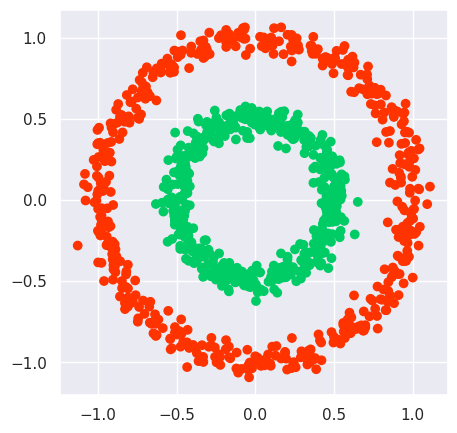

In [ ]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Обучите реализованную ранее нейросеть решать задачу классификации на основе этой выборки.

*Периодически во время обучения рисуйте график лосса. Если он возрастает, стоит поискать ошибку.*

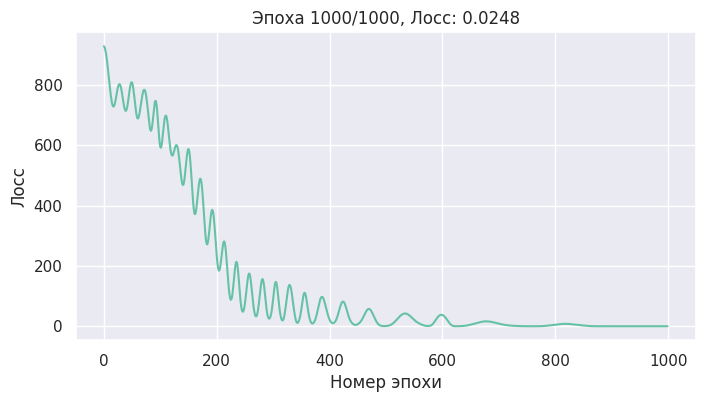

In [ ]:
nn = TwoLayersNNClassifier(input_size=2, hidden_size=20, n_epoch=1000)
nn.fit(X, y, verbose=True, plot_freq=10)

С помощью функции `np.meshgrid` создайте двухмерную сетку в диапазоне $[-1.5, 1.5]$ по каждой координате с шагом не более $0.02$. Для каждой точки сетки посчитайте оценки вероятностей принадлежности тому или иному классу.

In [ ]:
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.02),
                     np.arange(-1.5, 1.5, 0.02))

grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = nn.predict_proba(grid_points)[:, 1]
Z = Z.reshape(xx.shape)

Визуализируйте полученные предсказания классов и вероятностей.

*Если у вас получилось плохое качество, попробуйте увеличить количество нейронов. Если не помогает, возможно, где-то ошибка.*

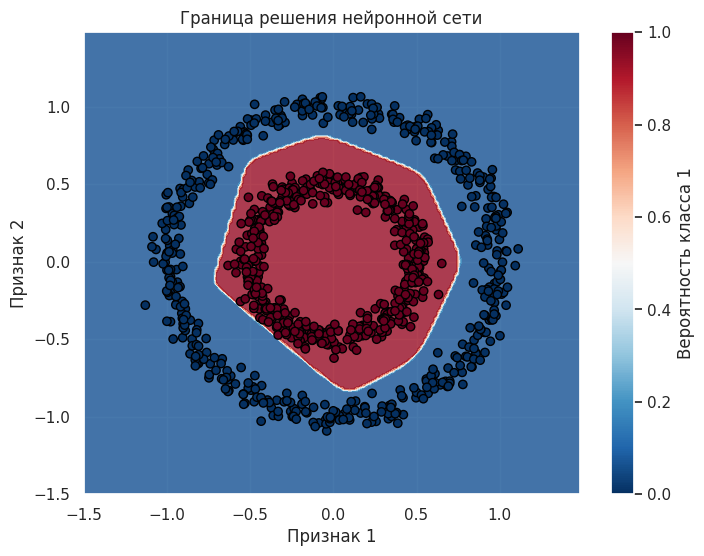

In [ ]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu_r)
plt.colorbar(label='Вероятность класса 1')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Граница решения нейронной сети')
plt.show()

Немного увеличим разброс данных

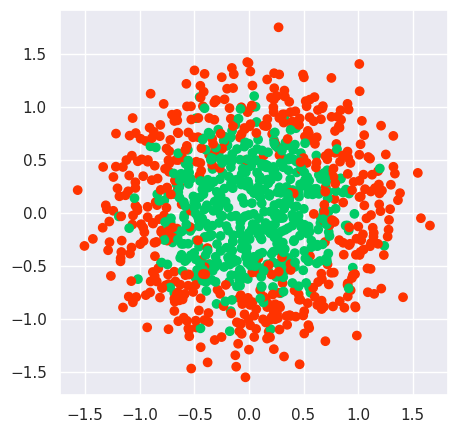

In [ ]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.25)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Повторите те же действия с новыми данными.

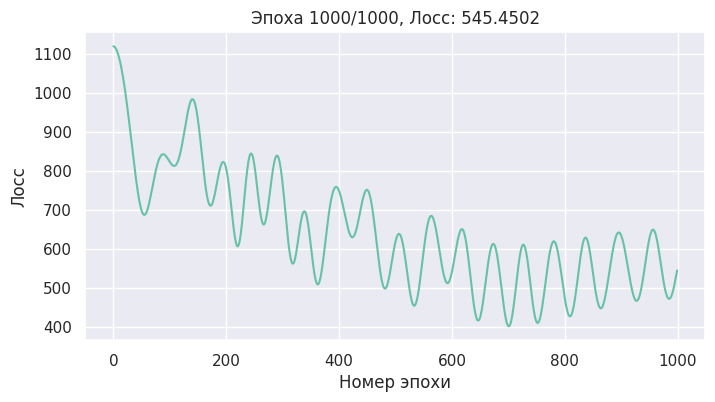

In [ ]:
nn2 = TwoLayersNNClassifier(input_size=2, hidden_size=30, n_epoch=1000, learning_rate=0.001)
nn2.fit(X, y, verbose=True, plot_freq=20)

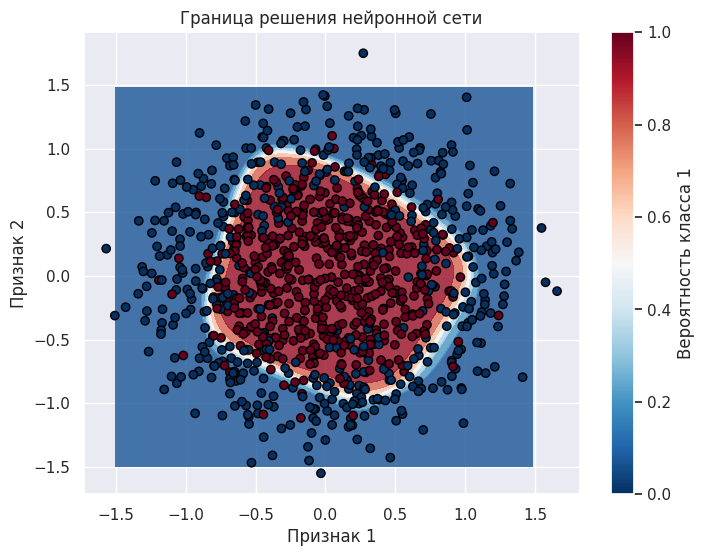

In [ ]:
Z2 = nn2.predict_proba(grid_points)[:, 1]
Z2 = Z2.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z2, alpha=0.8, cmap=plt.cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu_r)
plt.colorbar(label='Вероятность класса 1')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Граница решения нейронной сети')
plt.show()

**Выводы:**

Видно, что во втором случае возникает проблема с  минимизацией лосс-функции, так как данные сильно пересекаются на границе, а значит построить четкую границу невозможно. Также края предсказанных вероятностей сильнее размыты по сравнению с первым случаем, когда можно было очень четко обозначить границу между данными. Но в целом нейронная сеть корректно определила, что значения около нуля скорее имеют "красный" класс 1, а границы картинки - "синий" класс 0.

**4.** Теперь давайте применим нашу нейронную сеть к данным MNIST.

Загрузите данные. Для этого воспользуйтесь кодом из задачи 1. Обратите внимание, что поскольку наша сеть реализована на `numpy` и принимает `numpy`-матрицы, потребуется предварительно перевести `torch`-тензоры в `numpy`-массивы.

Поскольку наша сеть была разработана для бинарной классификации, мы будем рассматривать изображения, на которых представлены только две цифры: `0` и `1`. Возьмите по 1000 изображений каждого символа и преобразуйте их в векторы. Также выделите изображения из тестовой выборки, соответствующие этим цифрам.

In [50]:
def prepare_data(dataset, num_samples):
    zeros = dataset.data[dataset.targets == 0][:num_samples]
    ones = dataset.data[dataset.targets == 1][:num_samples]

    images = torch.cat([zeros, ones]).numpy()
    labels = torch.cat([
        dataset.targets[dataset.targets == 0][:num_samples],
        dataset.targets[dataset.targets == 1][:num_samples]
    ]).numpy()

    images = images.reshape(-1, 28*28) / 255.0
    return images, labels

transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

X_train, y_train = prepare_data(train_data, num_samples=1000)
X_test, y_test = prepare_data(test_data, num_samples=500)

In [53]:
X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]

(2000, 2000, 1000, 1000)

Обучите реализованную ранее нейронную сеть к этим данным.


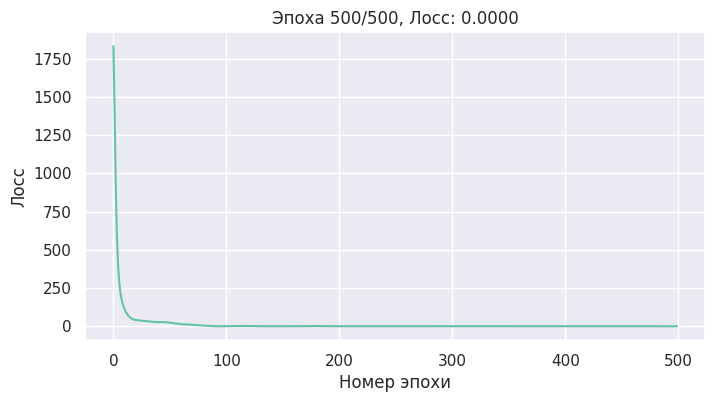

In [64]:
nn_mnist = TwoLayersNNClassifier(input_size=28*28, hidden_size=14*14, n_epoch=500, learning_rate=0.05)
nn_mnist.fit(X_train, y_train, verbose=True, plot_freq=10)

Посчитайте качество обученной нейросети на тестовой выборке. Можете ли вы сказать, насколько хорошо сеть обучилась?

In [65]:
y_pred = nn_mnist.predict(X_test).reshape(-1)
accuracy = (y_pred == y_test)
print(f"Точность работы модели на тестовой выборке: {np.mean(accuracy)}")

Точность работы модели на тестовой выборке: 0.999


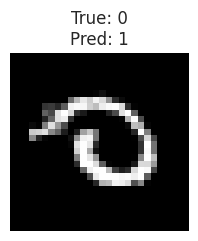

In [66]:
plt.figure(figsize=(10, 5))
j = 1
for i in range(1000):
    if y_pred[i] == y_test[i]:
      continue
    j += 1
    plt.subplot(2, 5, j)
    img = X_test[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Выводы:**

Модель очень хорошо научилась на обучающей выборке и даёт результат с точностью до 0.001%. Из 1000 тестовых данных она ошиблась всего 1 раз. При этом время обучения заняло около 1 минуты, что немного при таком количестве параметров и регулярной отрисовке графиков.

---
### Задача 4.

Рассмотрим глубокую нейронную сеть, которая
* принимает на вход $x\in\mathbb{R}^d$,
* возвращает $y\in\{0, 1\}$,
* содержит $99$ полносвязных слоев (`Linear`) с функцией активации $\tanh$, за исключением последнего слоя,
* последний слой использует функцию активации логистическая сигмоида.

В качестве лосса $\mathscr{L}(\theta)$ возьмем кросс-энтропию.

**1.** Распишите градиент лосса по весам первого слоя $W_1$. Какова сложность этой операции?

Градиент по $W_1$:
$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial a_{99}} \cdot \frac{\partial a_{99}}{\partial a_{98}} \cdots \frac{\partial \mathbf{a}_2}{\partial a_1} \cdot \frac{\partial a_1}{\partial W_1}
$$

где $a_k = W_k \tanh(a_{k-1}) + b_k$ (для последнего слоя $a_{99} = W_{99} \sigma(a_{98}) + b_{99}$)

Берём производные:

$$
\frac{\partial L}{\partial a_{99}} = y - \hat{y}
$$

$$
\frac{\partial a_{k+1}}{\partial a_k} = W_k \cdot \frac{\partial}{\partial a_k} (\tanh a_k) = \text{diag}(1 - \tanh^2(a_k)) \cdot W_k^T
$$
Транспонируем веса для back propagation.

$$
\frac{\partial a_1}{\partial W_1} = \text{diag}(1 - \tanh^2(a_1)) \cdot \mathbf{x}^T
$$

В общем:
$$
\frac{\partial L}{\partial W_1} = (y - \hat{y}) \cdot W_{99}^T D_{98} W_{98}^T \cdots D_2 W_2^T D_1 \mathbf{x}^T
$$

Сложность: $O(N * d^3)$

Нарисуйте график функции активации и ее производной.

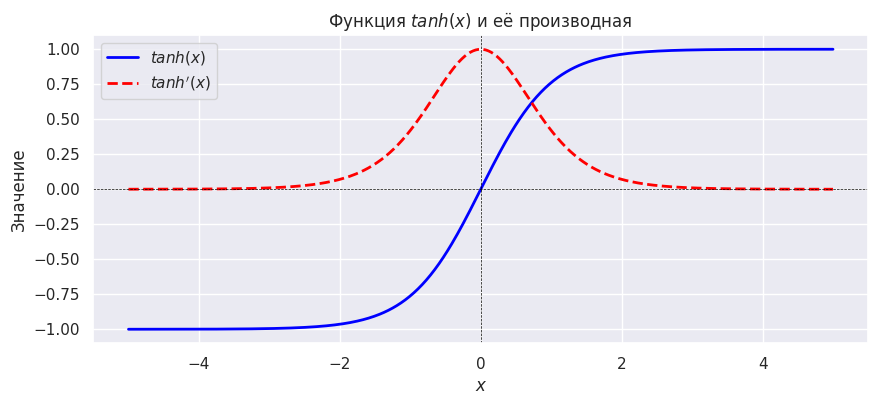

In [70]:
x = np.linspace(-5, 5, 500)
y_tanh = np.tanh(x)
y_tanh_deriv = 1 - np.tanh(x)**2

plt.figure(figsize=(10, 4))
plt.plot(x, y_tanh, label='$tanh(x)$', color='blue', linewidth=2)
plt.plot(x, y_tanh_deriv, label='$tanh\'(x)$', color='red', linewidth=2, linestyle='--')
plt.title('Функция $tanh(x)$ и её производная')
plt.xlabel('$x$')
plt.ylabel('Значение')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

На основе графика проанализируйте, что будет происходить с градиентом по весам первого слоя, если нейросеть "ненулевая", иначе говоря, на промежуточных слоях может выдавать различные значения, в том числе довольно большие.

Так как производная гипертангенса резко падает на значениях $|x| > 2$, а градиент по весам первого слоя зависит от произведения таких производных, то в больших нейронных сетях (как в нашем примере, 99 слоев), градиент будет очень мал, чтобы с ним работать. Например, если даже небольшое количество $a_k$ будут достаточно велики, то порядок градиента будет ничтожно мал, что ломает модель (мы не сможем никуда сдвинуться при адекватных значениях learning rate).

**2.** Реализуйте эту нейросеть на **PyTorch**.

*Примечание.* Каждый слой должен быть инициализирован отдельно. Нельзя создавать копии уже инициализированного слоя.

In [90]:
# При реализации нейросети запрещено пользоваться ИИ-инструментами.

class DeepSequential(nn.Module):
    def __init__(self, input_size=100, hidden_size=100, layers_number=99, learning_rate=0.01, n_epochs=100):
        super().__init__()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

        layers = []

        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.BatchNorm1d(hidden_size))
        layers.append(nn.Tanh())

        for _ in range(2, layers_number):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.Tanh())

        layers.append(nn.Linear(hidden_size, 1))
        layers.append(nn.Sigmoid())

        self.model = nn.Sequential(*layers).to(self.device)
        self._initialize_weights()
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def _initialize_weights(self):
        for m in self.model:
            if isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)
                init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm1d):
                init.ones_(m.weight)
                init.zeros_(m.bias)

    def forward(self, x):
        return self.model(x)

    def fit(self, X, y, batch_size=32, verbose=True):
        if not isinstance(X, torch.Tensor):
            X = torch.FloatTensor(X)
        if not isinstance(y, torch.Tensor):
            y = torch.FloatTensor(y)

        dataset = TensorDataset(X, y)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        self.train()
        for epoch in range(1, self.n_epochs + 1):
            print(f'epoch: {epoch}')
            epoch_loss = 0.0
            for batch_X, batch_y in loader:
                batch_X = batch_X.to(self.device)
                batch_y = batch_y.unsqueeze(1).to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()

                epoch_loss += loss.item()

            if verbose and (epoch == 1 or epoch % 5 == 0 or epoch == self.n_epochs):
                print(f'Epoch {epoch}/{self.n_epochs} - Loss: {epoch_loss / len(loader):.4f}')

    def predict(self, X):
        self.eval()
        with torch.no_grad():
            if not isinstance(X, torch.Tensor):
                X = torch.FloatTensor(X)
            X = X.to(self.device)
            outputs = self.model(X).cpu().numpy()
        return outputs.flatten()

    def evaluate(self, X, y):
        preds = self.predict(X)
        if isinstance(y, torch.Tensor):
            y = y.numpy()
        return accuracy_score(y, preds > 0.5)


Аналогично задаче 3 попробуйте обучить эту нейросеть для классификации изображений с цифрами 0 и 1 из датасета MNIST. Скорее всего весь датасет не поместится в память, поэтому предлагается использовать случайную подвыборку (батч) размера 32 на каждом шаге обучения.

In [83]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Lambda(lambda x: x.view(-1))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

def filter_01(dataset):
    data = []
    targets = []
    for i in range(len(dataset)):
        if dataset.targets[i] in (0, 1):
            data.append(dataset[i][0])
            targets.append(float(dataset[i][1]))
    return torch.stack(data), torch.tensor(targets)

X_train, y_train = filter_01(train_dataset)
X_test, y_test = filter_01(test_dataset)

In [93]:
model = DeepSequential(input_size=28*28, hidden_size=7*7, n_epochs=15)
model.fit(X_train, y_train)
accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

epoch: 1
Epoch 1/15 - Loss: 0.6625
epoch: 2
epoch: 3
epoch: 4
epoch: 5
Epoch 5/15 - Loss: 0.6913
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
Epoch 10/15 - Loss: 0.6371
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
Epoch 15/15 - Loss: 0.5566
Test Accuracy: 0.9669


Постройте график зависимости среднего и максимального абсолютного значения градиента по весам для каждого слоя от номера слоя.

In [100]:
def plot_gradient_distribution(model, X, y):
    # Переводим модель в режим обучения
    model.train()

    # Подготовка данных
    if not isinstance(X, torch.Tensor):
        X = torch.FloatTensor(X)
    if not isinstance(y, torch.Tensor):
        y = torch.FloatTensor(y)
    X = X.to(model.device)
    y = y.unsqueeze(1).to(model.device)

    # Прямой проход
    outputs = model(X)
    loss = model.criterion(outputs, y)

    # Обратный проход
    model.optimizer.zero_grad()
    loss.backward()

    # Собираем статистику по градиентам
    layer_gradients = []
    for name, param in model.named_parameters():
        if 'weight' in name and param.grad is not None:
            grad = param.grad.data.abs()
            layer_gradients.append({
                'mean': grad.mean().item(),
                'max': grad.max().item(),
                'layer': int(name.split('.')[1]) if '.' in name else 0
            })

    # Сортируем по номеру слоя
    layer_gradients.sort(key=lambda x: x['layer'])

    # Подготовка данных для графика
    layers = [g['layer'] for g in layer_gradients]
    mean_grads = [g['mean'] for g in layer_gradients]
    max_grads = [g['max'] for g in layer_gradients]

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(layers, mean_grads, 'b-o', label='Среднее абсолютное значение градиента')
    plt.plot(layers, max_grads, 'r--s', label='Максимальное абсолютное значение градиента')

    plt.xlabel('Номер слоя')
    plt.ylabel('Значение градиента')
    plt.title('Распределение градиентов по слоям')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')  # Логарифмическая шкала для лучшей визуализации
    plt.show()

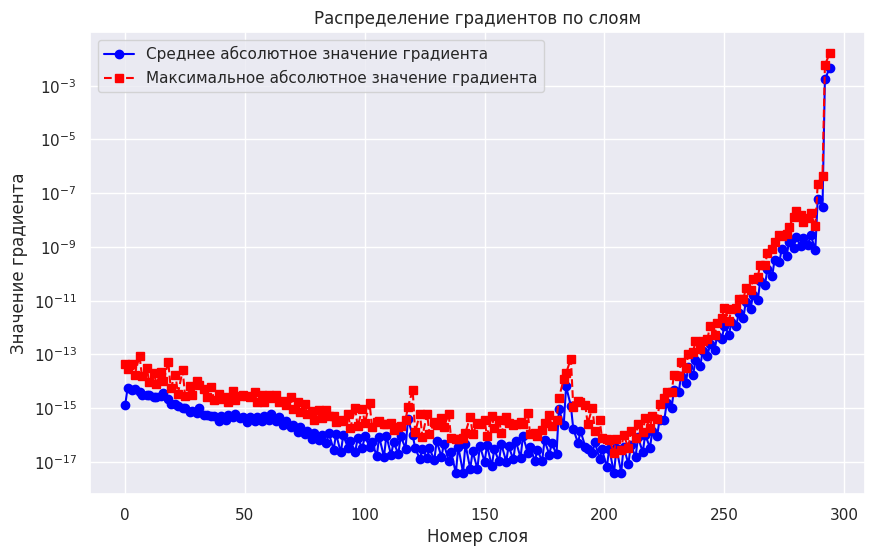

In [101]:
plot_gradient_distribution(model, X_train, y_train)

**Выводы:**

Слоёв около 300, так как каждый слой имеет ещё 2 дополнительных (Linear + BatchNorm + Tanh)

Мы видим, что некоторые слои имеют очень маленькие градиенты, достигающие $10^{-17}$ по значению. Из-за этого нейросеть, приходя к этим значениям, не может сдвинуться на какое-то существенное число, чтобы улучшить свои результаты, так как значения слишком малы. Ниже написано, как это называется и решается

*Примечание.* Подобная ситуация известна как "паралич" нейросети. Именно поэтому такие функции активации, как ReLU, стали очень популярными. Для преодоления этого паралича существует множество методов, многие из которых мы рассмотрим на 3 курсе.